# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2


In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
dataset = fetch_california_housing()
X, Y = dataset.data, dataset.target

In [3]:
X.shape

(20640, 8)

In [4]:
feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HouseAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

In [5]:
import matplotlib.pyplot as plt

def plot_hist(feature):
    feature_idx = feature_names.index(feature)
    variable = feature_mapping[feature]
    X_ = X[:, feature_idx]
    x, bins, patches = plt.hist(x=X_, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Unscaled data')
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    

Ver https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html para otras configuraciones de hist

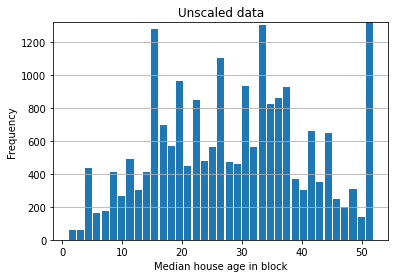

In [6]:
plot_hist('HouseAge')

In [7]:
from sklearn import preprocessing

def standardization(feature):
    feature_idx = feature_names.index(feature)
    variable = feature_mapping[feature]
    X_ = X[:, feature_idx]
    X_ = np.reshape(X_, (X.shape[0], 1))
    scaler = preprocessing.StandardScaler().fit(X_)
    X_scaled = scaler.transform(X_)
    x, bins, patches = plt.hist(x=X_scaled, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Standardized data')
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    

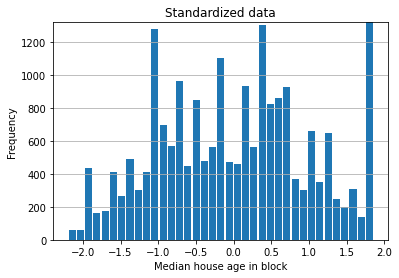

In [8]:
standardization('HouseAge')

In [9]:
def scaling(feature):
    feature_idx = feature_names.index(feature)
    variable = feature_mapping[feature]
    X_ = X[:, feature_idx]
    X_ = np.reshape(X_, (X.shape[0], 1))
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scaled = min_max_scaler.fit_transform(X_)
    x, bins, patches = plt.hist(x=X_scaled, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Scaled data [0,1]')
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    

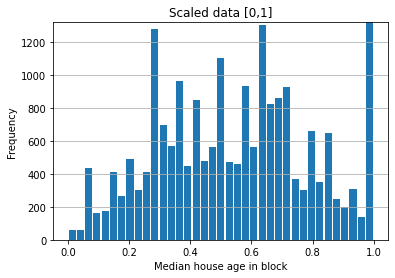

In [10]:
scaling('HouseAge')

In [11]:
def robust_scaling(feature):
    feature_idx = feature_names.index(feature)
    variable = feature_mapping[feature]
    X_ = X[:, feature_idx]
    X_ = np.reshape(X_, (X.shape[0], 1))
    transformer = preprocessing.RobustScaler().fit(X_)
    X_scaled = transformer.transform(X_)
    x, bins, patches = plt.hist(x=X_scaled, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Scaled data (IQR)')
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

Ver https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html para otras configuraciones

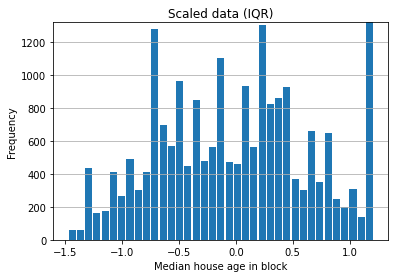

In [12]:
robust_scaling('HouseAge')

Encoding de variables categóricas

In [13]:
enc = preprocessing.OrdinalEncoder()
X = [['american'], ['assian'], [np.nan], ['black'], ['latin']]
enc.fit_transform(X)

array([[ 0.],
       [ 1.],
       [nan],
       [ 2.],
       [ 3.]])

In [14]:
races = ['american', 'assian', 'black', 'latin']
enc = preprocessing.OneHotEncoder(categories=[races])
X = [['american'],['latin']]
enc.fit(X)
enc.transform(X).toarray()

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [15]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
h.transform(D).toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])